In [3]:
from sklearn import datasets as ds
import pandas as pd
import numpy as np
import os, os.path
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import colorsys
from PIL import Image

from sklearn.decomposition import KernelPCA
import zipfile

import skimage
from skimage import io

from skimage.transform import resize
from random import shuffle


In [4]:
with zipfile.ZipFile('train/ALLL/ALL.zip', 'r') as zf:
        zf.extractall('train/ALLL/')
        zf.close()

In [5]:
import glob2
from PIL import Image
import matplotlib.image as mpimg

#albacore_image_files = glob.glob('train/BET/*.jpg')
fish_image_files = glob2.glob('train/**/*.jpg')
shuffle(fish_image_files)
files_subset = fish_image_files[:1000]
# print(image_files)
albacore_image_list = []
size = 300, 300

# for filename in albacore_image_files:
#     image=Image.open(filename).resize(size)
#     albacore_image_list.append(image)
# albacore_image_list

In [6]:
files_subset

['train/NoF/img_00413.jpg',
 'train/ALL/img_04296.jpg',
 'train/ALB/img_01641.jpg',
 'train/ALL/img_03918.jpg',
 'train/ALL/img_01445.jpg',
 'train/ALL/img_04968.jpg',
 'train/YFT/img_04472.jpg',
 'train/ALL/img_07901.jpg',
 'train/ALL/img_07486.jpg',
 'train/ALL/img_01693.jpg',
 'train/OTHER/img_00721.jpg',
 'train/DOL/img_00689.jpg',
 'train/ALL/img_02068.jpg',
 'train/ALL/img_01460.jpg',
 'train/ALB/img_07836.jpg',
 'train/NoF/img_03849.jpg',
 'train/ALL/img_02829.jpg',
 'train/ALB/img_00209.jpg',
 'train/ALL/img_02032.jpg',
 'train/NoF/img_01383.jpg',
 'train/ALB/img_01454.jpg',
 'train/YFT/img_07571.jpg',
 'train/BET/img_01350.jpg',
 'train/NoF/img_01071.jpg',
 'train/ALL/img_02748.jpg',
 'train/ALB/img_03927.jpg',
 'train/ALB/img_04981.jpg',
 'train/ALL/img_06344.jpg',
 'train/ALL/img_04235.jpg',
 'train/ALL/img_05110.jpg',
 'train/ALB/img_03990.jpg',
 'train/ALL/img_07195.jpg',
 'train/ALL/img_07584.jpg',
 'train/ALB/img_00208.jpg',
 'train/ALL/img_06213.jpg',
 'train/ALL/img_02

In [7]:
igs = np.array([skimage.transform.resize(skimage.io.imread(fname, as_grey=True, plugin=None, flatten=None),(300,300))
                                         for fname in files_subset])

In [104]:
igs_sk.shape

(200, 300, 300)

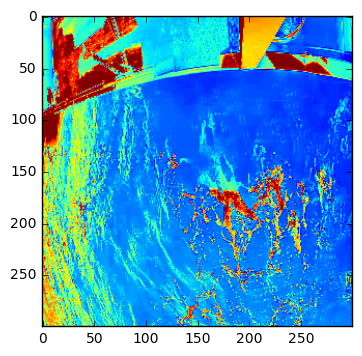

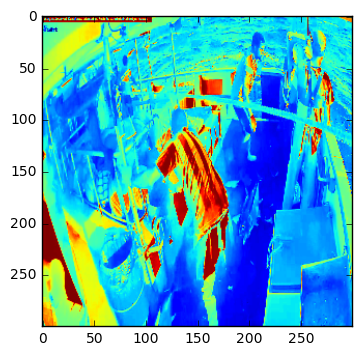

In [8]:
for i in range(0,2):
    plt.imshow(igs[i])
    plt.show()

In [106]:
print(type(igs))
print(igs[0].shape)
igs[0].size

<class 'numpy.ndarray'>
(300, 300)


90000

In [107]:
igs[0].shape

(300, 300)

In [117]:
igs.shape[0]

200

In [9]:
train_data = igs.astype('float32')
train_data = train_data / 255
print(train_data.shape)
igs_pca = train_data.reshape(igs.shape[0], (train_data.shape[1]*train_data.shape[2]))


(1000, 300, 300)


In [119]:
igs_pca.shape

(200, 90000)

In [10]:
n_components = 50
print ("Extracting the top %d eigenfaces from %d faces" % (n_components, igs.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=15) # very sensitive to the gamma parameter
%time kpca.fit(igs_pca)


Extracting the top 50 eigenfaces from 1000 faces
CPU times: user 6.64 s, sys: 380 ms, total: 7.02 s
Wall time: 2.38 s


KernelPCA(alpha=1.0, coef0=1, degree=3, eigen_solver='auto',
     fit_inverse_transform=True, gamma=15, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=50,
     remove_zero_eig=False, tol=0)

In [26]:
# lets do some PCA of the features and go from 1850 features to 20 features
from sklearn.decomposition import PCA

n_components = 173
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, igs_pca.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(igs_pca)
eigenfaces = pca.components_.reshape((n_components, train_data.shape[1]*train_data.shape[2]))

Extracting the top 173 eigenfaces from 1000 faces
CPU times: user 21.7 s, sys: 975 ms, total: 22.7 s
Wall time: 6.71 s


In [12]:
pca.components_.shape

(50, 90000)

In [16]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Scatter, Marker, Layout, XAxis, YAxis, Bar, Line
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
        

In [27]:
plot_explained_variance(pca)

In [ ]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

from ipywidgets import widgets  # make this interactive!
# compare the different methods
X = igs_pca
n_samples, n_features = igs_pca.shape
def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct]))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[idx_to_reconstruct]))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(X[idx_to_reconstruct].reshape((train_data.shape[1], train_data.shape[2])), cmap=plt.cm.gray)
    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((train_data.shape[1], train_data.shape[2])), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_kpca.reshape((train_data.shape[1], train_data.shape[2])), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()
    plt.show()
